**Inicijalizacija biblioteka**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import det, inv

**Učitavanje podataka**

In [2]:
data = np.loadtxt('dataset/data.txt')
data

array([[ 2.4340613 ,  5.27192868,  0.        ],
       [ 1.21403076,  1.08466624,  0.        ],
       [-3.11252628, -0.86332779,  0.        ],
       ...,
       [ 7.92286656,  7.77075534,  1.        ],
       [11.62676793,  9.37774101,  1.        ],
       [10.96518065,  9.73088706,  1.        ]])

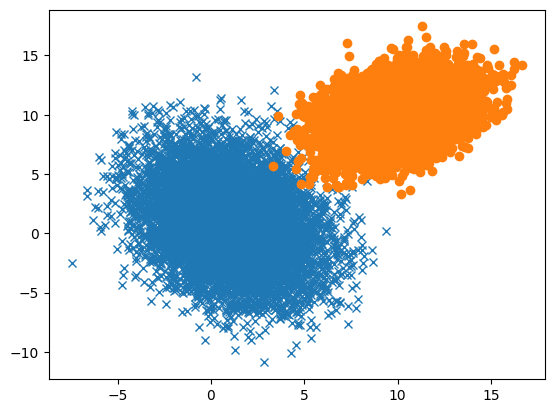

In [3]:
data_class = data[:, 2]
data = data[:,0:2]

class_A = data[data_class==0]
class_B = data[data_class==1]

plt.figure()
plt.plot(class_A[:,0], class_A[:,1], 'x')
plt.plot(class_B[:,0], class_B[:,1], 'o')


**Estimiranje parametara klasa**

In [4]:
M_1 = np.mean(class_A, axis=0)
S_1 = np.cov(class_A.T)
M_2 = np.mean(class_B, axis=0)
S_2 = np.cov(class_B.T)

**Estimiranje klase svake tačke prostora**

In [5]:
x = np.linspace(-10,20,300)
y = np.linspace(-10,20,300)
detected_class = np.zeros((300, 300))
for i in range(0, 300):
    for j in range(0, 300):
        data = [x[i], y[j]]
        f1 = 1 / (2*np.pi*(det(S_1) ** 0.5)) * np.exp(-0.5 * (data - M_1)@inv(S_1)@((data - M_1).T))
        f2 = 1 / (2*np.pi*(det(S_2) ** 0.5)) * np.exp(-0.5 * (data - M_2)@inv(S_2)@((data - M_2).T))
        if f1>f2:
            detected_class[i, j] = 0
        else:
            detected_class[i, j] = 1

**Izlaz klasifikatora**

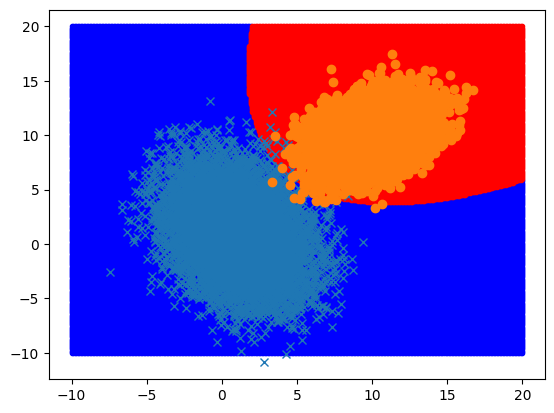

In [6]:
x_feature, y_feature = np.meshgrid(x, y)

x_feature_class_A = x_feature[detected_class == 0]; x_feature_class_B = x_feature[detected_class == 1]
y_feature_class_A = y_feature[detected_class == 0]; y_feature_class_B = y_feature[detected_class == 1]

plt.figure()
plt.plot(x_feature_class_A, y_feature_class_A, 'b.')
plt.plot(x_feature_class_B, y_feature_class_B, 'r.')
plt.plot(class_A[:,0], class_A[:,1], 'x')
plt.plot(class_B[:,0], class_B[:,1], 'o')